In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Let's start by loading the expanded dataset and taking a preliminary look at its contents
# We will display the first few rows to understand the structure and types of data it contains
df = pd.read_csv('./Expanded_data_with_more_features.csv')
df.head()



,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,NaN,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,NaN,married,sometimes,yes,0.0,NaN,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,NaN,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [3]:
df.describe()

,Unnamed: 0,NrSiblings,MathScore,ReadingScore,WritingScore
count,30641.000000,29069.000000,30641.000000,30641.000000,30641.000000
mean,499.556607,2.145894,66.558402,69.377533,68.418622
std,288.747894,1.458242,15.361616,14.758952,15.443525
min,0.000000,0.000000,0.000000,10.000000,4.000000
25%,249.000000,1.000000,56.000000,59.000000,58.000000
50%,500.000000,2.000000,67.000000,70.000000,69.000000
75%,750.000000,3.000000,78.000000,80.000000,79.000000
max,999.000000,7.000000,100.000000,100.000000,100.000000


In [4]:
# Getting summary statistics for the numerical columns
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Unnamed: 0           30641 non-null  int64  
 1   Gender               30641 non-null  object 
 2   EthnicGroup          28801 non-null  object 
 3   ParentEduc           28796 non-null  object 
 4   LunchType            30641 non-null  object 
 5   TestPrep             28811 non-null  object 
 6   ParentMaritalStatus  29451 non-null  object 
 7   PracticeSport        30010 non-null  object 
 8   IsFirstChild         29737 non-null  object 
 9   NrSiblings           29069 non-null  float64
 10  TransportMeans       27507 non-null  object 
 11  WklyStudyHours       29686 non-null  object 
 12  MathScore            30641 non-null  int64  
 13  ReadingScore         30641 non-null  int64  
 14  WritingScore         30641 non-null  int64  
dtypes: float64(1), int64(4), object(10)


In [5]:
# Checking for missing values
df.isnull().sum()


Unnamed: 0                0
Gender                    0
EthnicGroup            1840
ParentEduc             1845
LunchType                 0
TestPrep               1830
ParentMaritalStatus    1190
PracticeSport           631
IsFirstChild            904
NrSiblings             1572
TransportMeans         3134
WklyStudyHours          955
MathScore                 0
ReadingScore              0
WritingScore              0
dtype: int64

## Dataset Overview
The dataset consists of 30,641 entries and 15 columns.
Data types include integer (int64), floating point (float64), and object (object), the types that aren't numbers are going to be parsed later on.
Muliple attributes are missing


## Handling null values

In [6]:
# Replace missing values in object columns with 'Unknown'
object_columns = df.select_dtypes(include='object').columns
for col in object_columns:
    df[col].fillna('Unknown', inplace=True)

# Replace missing values in numeric columns with the mean, rounded to the nearest integer
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns
for col in numeric_columns:
    df[col].fillna(round(df[col].mean()), inplace=True)

df.head()


,Unnamed: 0,Gender,EthnicGroup,ParentEduc,LunchType,TestPrep,ParentMaritalStatus,PracticeSport,IsFirstChild,NrSiblings,TransportMeans,WklyStudyHours,MathScore,ReadingScore,WritingScore
0,0,female,Unknown,bachelor's degree,standard,none,married,regularly,yes,3.0,school_bus,< 5,71,71,74
1,1,female,group C,some college,standard,Unknown,married,sometimes,yes,0.0,Unknown,5 - 10,69,90,88
2,2,female,group B,master's degree,standard,none,single,sometimes,yes,4.0,school_bus,< 5,87,93,91
3,3,male,group A,associate's degree,free/reduced,none,married,never,no,1.0,Unknown,5 - 10,45,56,42
4,4,male,group C,some college,standard,none,married,sometimes,yes,0.0,school_bus,5 - 10,76,78,75


In [7]:
missing_values = df.isnull().sum()
missing_values  #Check that the previous snippet worked nice



Unnamed: 0             0
Gender                 0
EthnicGroup            0
ParentEduc             0
LunchType              0
TestPrep               0
ParentMaritalStatus    0
PracticeSport          0
IsFirstChild           0
NrSiblings             0
TransportMeans         0
WklyStudyHours         0
MathScore              0
ReadingScore           0
WritingScore           0
dtype: int64

In [8]:
# add a new column called 'Overall_Score' to put the overall score for each student
df['Overall_Score'] = ((df['MathScore'] + df['ReadingScore'] + df['WritingScore']) / 3).round(2)


# Assuming we have the following grading scale:
# A: 90-100, B: 80-89, C: 70-79, D: 60-69, F: 0-59
def assign_grade(score):
    if 90 <= score <= 100:
        return 'A'
    elif 80 <= score < 90:
        return 'B'
    elif 70 <= score < 80:
        return 'C'
    elif 60 <= score < 70:
        return 'D'
    else:
        return 'F'
# add a new column called 'Grades' that contains students grades
df['Grades'] = df['Overall_Score'].apply(assign_grade)

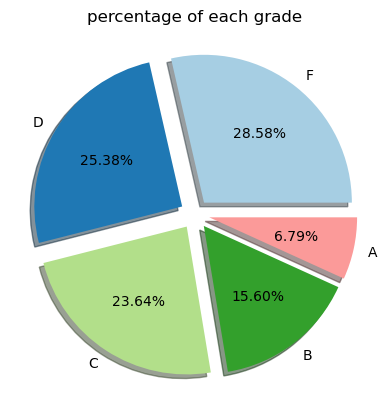

In [9]:
# Count the percentage of each grade
grade_counts = df['Grades'].value_counts()
grade_counts.plot(kind='pie', autopct='%0.2f%%', explode=[0.1, 0.1, 0.1, 0.1, 0.1], labels=grade_counts.index, shadow=True, colors=sns.color_palette("Paired"))
plt.title('percentage of each grade')
plt.ylabel('')
plt.show()

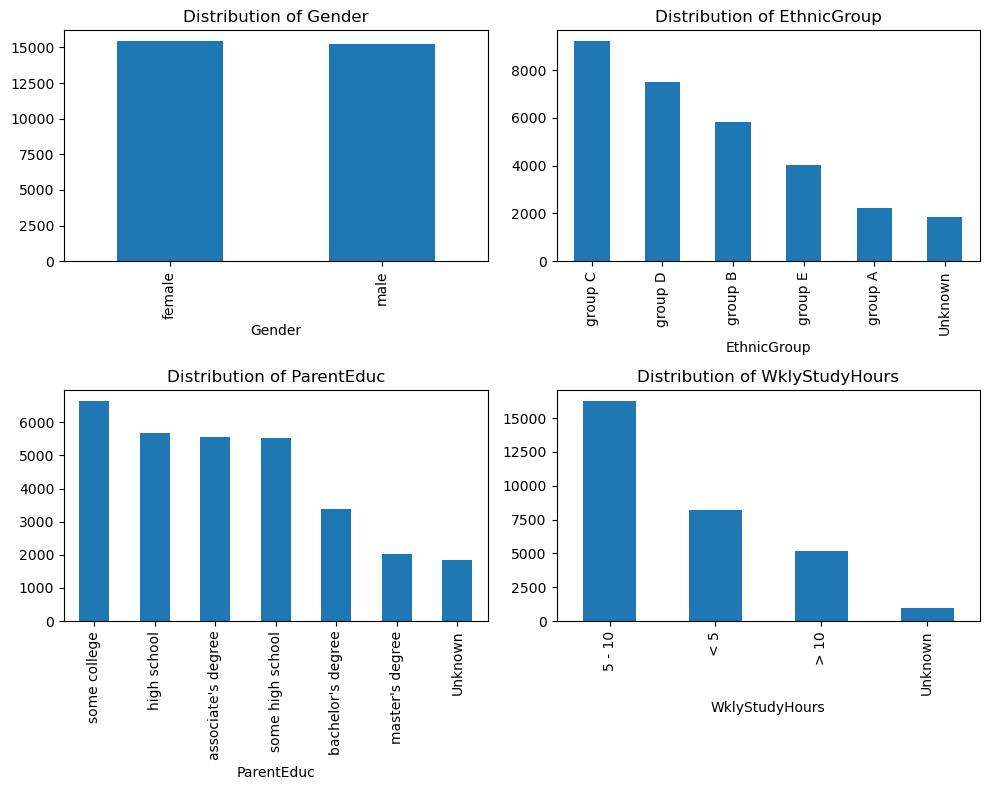

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(10, 8))

# Iterate over the columns and create the distribution plots
columns = ['Gender', 'EthnicGroup', 'ParentEduc', 'WklyStudyHours']
for i, col in enumerate(columns):
    ax = axs[i//2, i%2]
    df[col].value_counts().plot(kind='bar', ax=ax)
    ax.set_title(f"Distribution of {col}")

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged graph
plt.show()

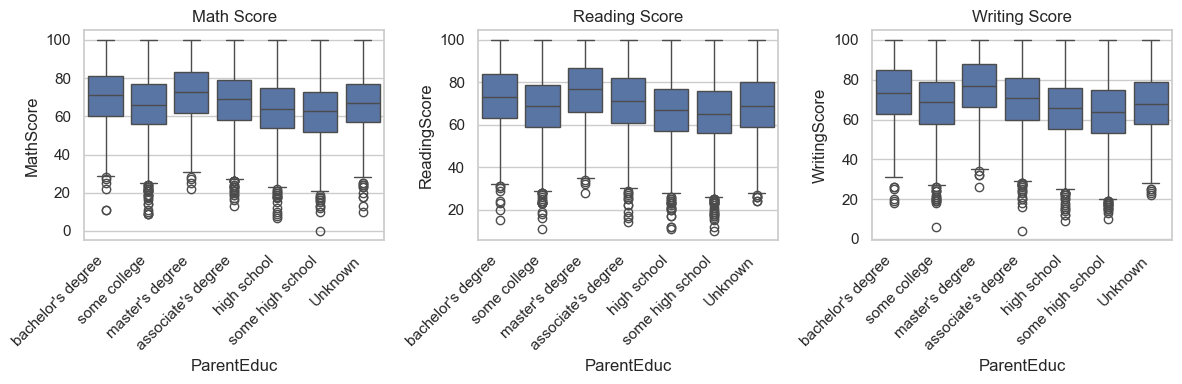

In [49]:
# Create a figure and three subplots
fig, axs = plt.subplots(1, 3, figsize=(12, 4))

# Box plot of MathScore by ParentEduc
sns.boxplot(ax=axs[0], x='ParentEduc', y='MathScore', data=df)
axs[0].set_title('Math Score')
axs[0].set_xticks(range(len(df['ParentEduc'].unique())))
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation=45, ha='right')

# Box plot of ReadingScore by ParentEduc
sns.boxplot(ax=axs[1], x='ParentEduc', y='ReadingScore', data=df)
axs[1].set_title('Reading Score')
axs[1].set_xticks(range(len(df['ParentEduc'].unique())))
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation=45, ha='right')

# Box plot of WritingScore by ParentEduc
sns.boxplot(ax=axs[2], x='ParentEduc', y='WritingScore', data=df)
axs[2].set_title('Writing Score')
axs[2].set_xticks(range(len(df['ParentEduc'].unique())))
axs[2].set_xticklabels(axs[2].get_xticklabels(), rotation=45, ha='right')

# Adjust the spacing between subplots
plt.tight_layout()

# Display the merged plot
plt.show()

### Overall Observations:

- There seems to be no clear trend that higher levels of ParentEduc correlate with higher median scores in Math, Reading, or Writing.
- The distribution of scores across different levels of ParentEduc is relatively consistent, implying that parental education might not be a strong indicator of students' performance in these subjects.
- The consistency of the IQR across all academic subjects suggests that the spread of scores is relatively uniform, regardless of the parental education level.


### Encoding variables for further modelling

In [50]:

df.drop(columns=['Unnamed: 0'], inplace=True)

# One-Hot Encoding for nominal variables
nominal_columns = ['Gender', 'EthnicGroup', 'LunchType', 'TestPrep', 'ParentMaritalStatus', 'TransportMeans']
df = pd.get_dummies(df, columns=nominal_columns, drop_first=True)

# Label Encoding for ordinal variables
label_encoder = LabelEncoder()
ordinal_columns = [ 'PracticeSport', 'IsFirstChild', 'ParentEduc', 'WklyStudyHours', 'Grades']
for col in ordinal_columns:
    df[col] = label_encoder.fit_transform(df[col])
    
#columns_to_drop = [ 'PracticeSport', 'IsFirstChild', 'ParentEduc', 'WklyStudyHours']
#df = df.drop(columns=columns_to_drop)

# View the transformed DataFrame
df.head()


,ParentEduc,PracticeSport,IsFirstChild,NrSiblings,WklyStudyHours,MathScore,ReadingScore,WritingScore,Overall_Score,Grades,...,EthnicGroup_group E,LunchType_standard,TestPrep_completed,TestPrep_none,ParentMaritalStatus_divorced,ParentMaritalStatus_married,ParentMaritalStatus_single,ParentMaritalStatus_widowed,TransportMeans_private,TransportMeans_school_bus
0,2,2,2,3.0,1,71,71,74,72.00,2,...,False,True,False,True,False,True,False,False,False,True
1,5,3,2,0.0,0,69,90,88,82.33,1,...,False,True,False,False,False,True,False,False,False,False
2,4,3,2,4.0,1,87,93,91,90.33,0,...,False,True,False,True,False,False,True,False,False,True
3,1,1,1,1.0,0,45,56,42,47.67,4,...,False,False,False,True,False,True,False,False,False,False
4,5,3,2,0.0,0,76,78,75,76.33,2,...,False,True,False,True,False,True,False,False,False,True


In [51]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30641 entries, 0 to 30640
Data columns (total 25 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   ParentEduc                    30641 non-null  int64  
 1   PracticeSport                 30641 non-null  int64  
 2   IsFirstChild                  30641 non-null  int64  
 3   NrSiblings                    30641 non-null  float64
 4   WklyStudyHours                30641 non-null  int64  
 5   MathScore                     30641 non-null  int64  
 6   ReadingScore                  30641 non-null  int64  
 7   WritingScore                  30641 non-null  int64  
 8   Overall_Score                 30641 non-null  float64
 9   Grades                        30641 non-null  int64  
 10  Gender_male                   30641 non-null  bool   
 11  EthnicGroup_group A           30641 non-null  bool   
 12  EthnicGroup_group B           30641 non-null  bool   
 13  E

In [52]:
#Makes more sense to have siblings as an int
df['NrSiblings'] = df['NrSiblings'].astype(int)

By the time we won't scale the data because we are not planning to use algorithms sensitive to the scale of the data, like SVMs, K-nearest neighbors, or neural networks.

### Compute the correlation matrix, to gain more insights

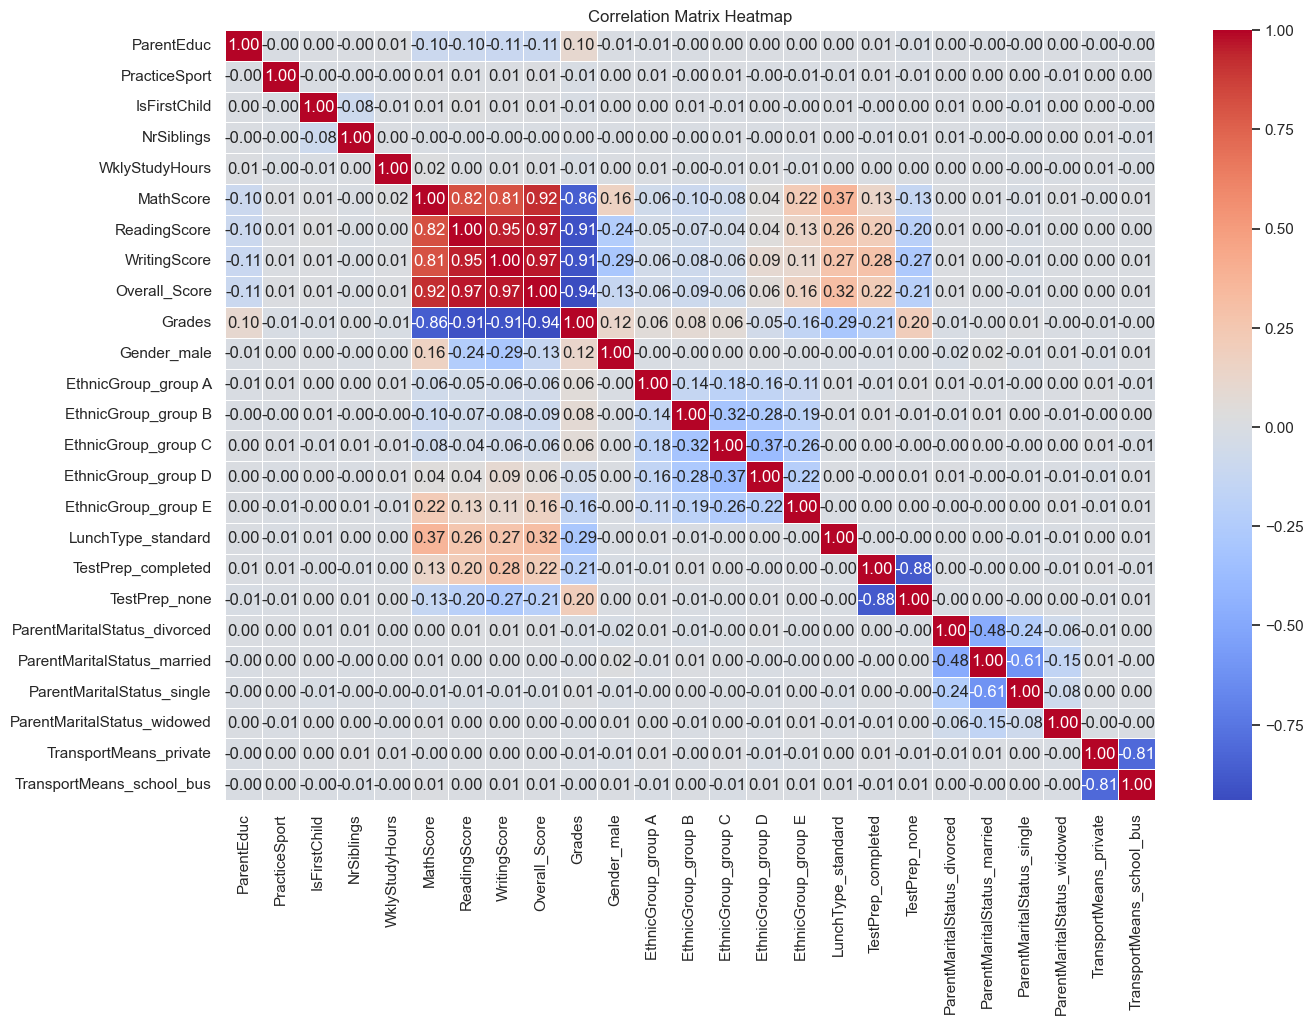

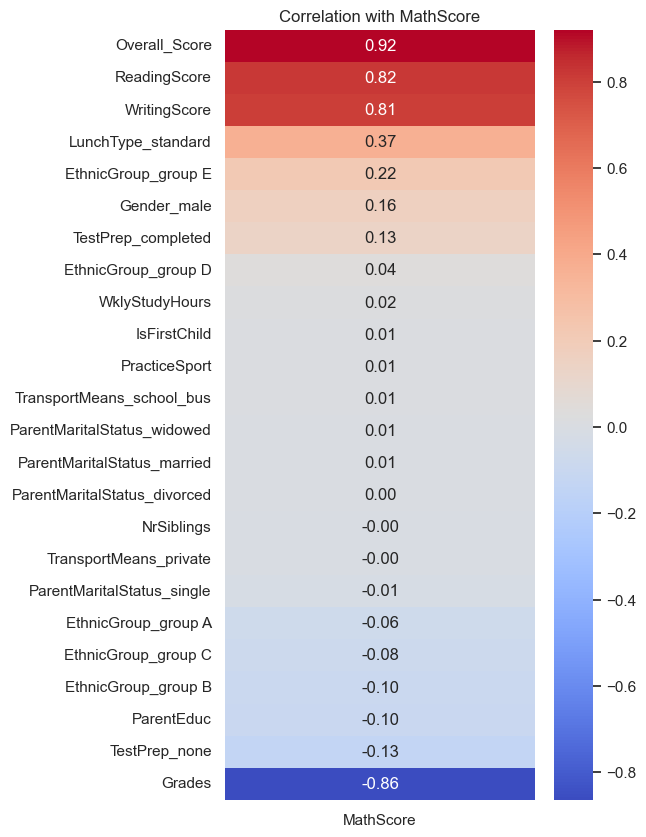

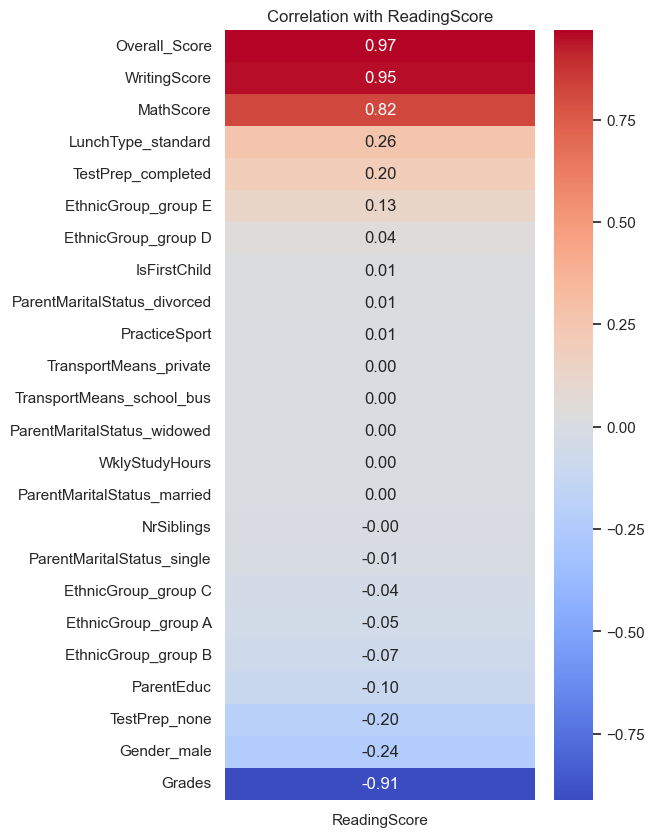

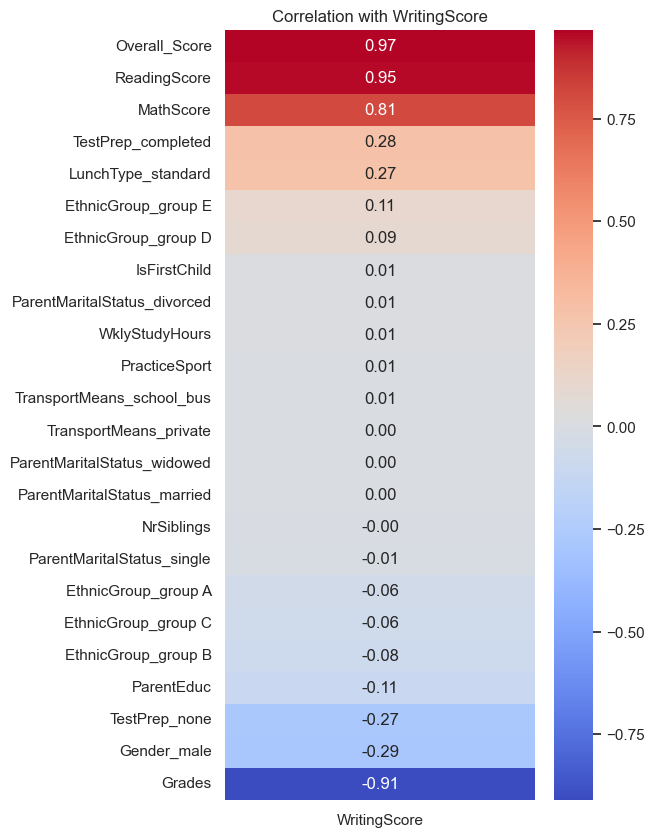

In [53]:
# Compute the correlation matrix
correlation_matrix = data1.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


# Compute the correlation matrix
correlation_matrix = data.corr()

# Graph II, III, IV: Correlation with MathScore, ReadingScore, WritingScore
for score_column in ['MathScore', 'ReadingScore', 'WritingScore']:
    # Create a heatmap of the correlations with the target column
    corr = data.corr()
    target_corr = corr[score_column].drop(score_column)

    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)

    plt.figure(figsize=(5, 10))
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
    plt.title(f'Correlation with {score_column}')
    plt.show()

# Findings from Correlation Matrix Analysis

## Parental Education and Academic Performance
- **Negative Correlation with Academic Scores:** There is a negative correlation between parental education (ParentEduc) and the academic scores (MathScore, ReadingScore, WritingScore), suggesting that higher parental education levels may not necessarily translate to better academic performance in these areas.

## Participation in Sports
- **Positive Correlation with Math Score:** PracticeSport shows a positive correlation with MathScore (0.014065), implying that students who participate in sports may have slightly better performance in math.

## First Child Status
- **Positive Correlation with Academic Scores:** Being the first child (IsFirstChild) shows a positive correlation with all academic scores, albeit weak, indicating that firstborns might have a slight edge in academic performance.

## Number of Siblings
- **Weak Negative Correlation with Academic Scores:** The number of siblings (NrSiblings) has a very weak negative correlation with academic scores, suggesting minimal impact of sibling count on academic performance.

## Weekly Study Hours
- **Positive Correlation with Academic Scores:** There is a positive correlation between the number of hours spent studying each week (WklyStudyHours) and academic scores, indicating that increased study time may contribute to better academic performance.

## Ethnic Group
- **Varied Correlation with Scores:** Different ethnic groups (EthnicGroup_group A-E) show varied correlations with academic scores. Notably, EthnicGroup_group E has a positive correlation with MathScore (0.221775), which might indicate specific cultural or educational factors influencing this outcome.

## Lunch Type and Standardized Test Preparation
- **Positive Correlation with Academic Scores:** Students who have a standard lunch type (LunchType_standard) and those who completed test preparation (TestPrep_completed) show positive correlations with academic scores, suggesting these factors may contribute to better academic outcomes.

## Parental Marital Status
- **Minor Correlations with Academic Scores:** Different parental marital statuses show minor correlations with academic scores. However, these correlations are relatively weak, suggesting that marital status is not a significant predictor of academic performance.

## Mode of Transportation
- **Minor Correlations with Academic Scores:** The mode of transportation to school (TransportMeans_private, TransportMeans_school_bus) shows minor correlations with academic scores. These correlations are weak, indicating that how students commute to school may not significantly impact their academic performance.


In [54]:
print(df[numerical_columns].corr())

              NrSiblings  MathScore  ReadingScore  WritingScore
NrSiblings      1.000000  -0.001084     -0.000796     -0.002375
MathScore      -0.001084   1.000000      0.817825      0.807118
ReadingScore   -0.000796   0.817825      1.000000      0.952584
WritingScore   -0.002375   0.807118      0.952584      1.000000


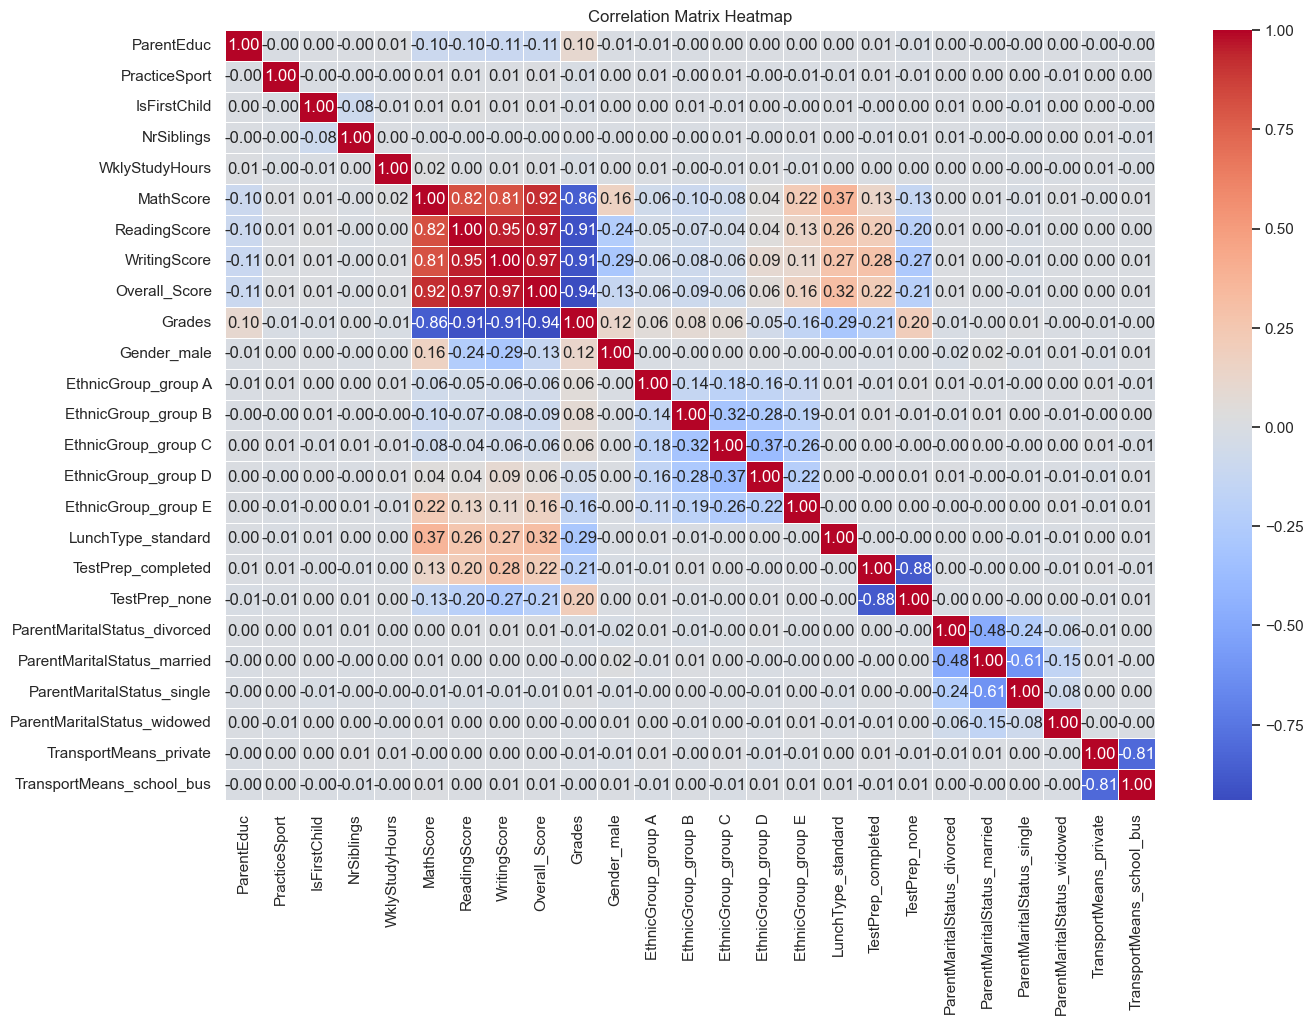

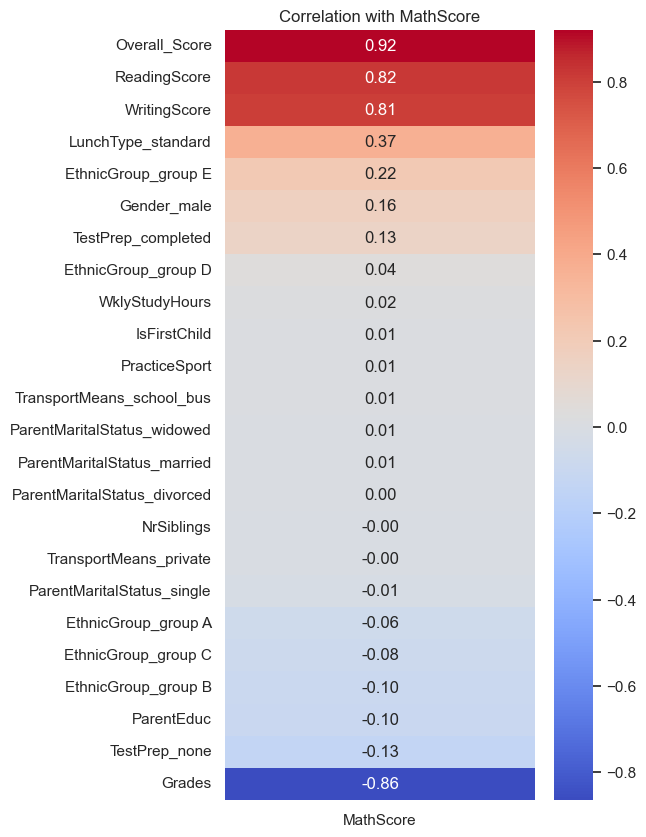

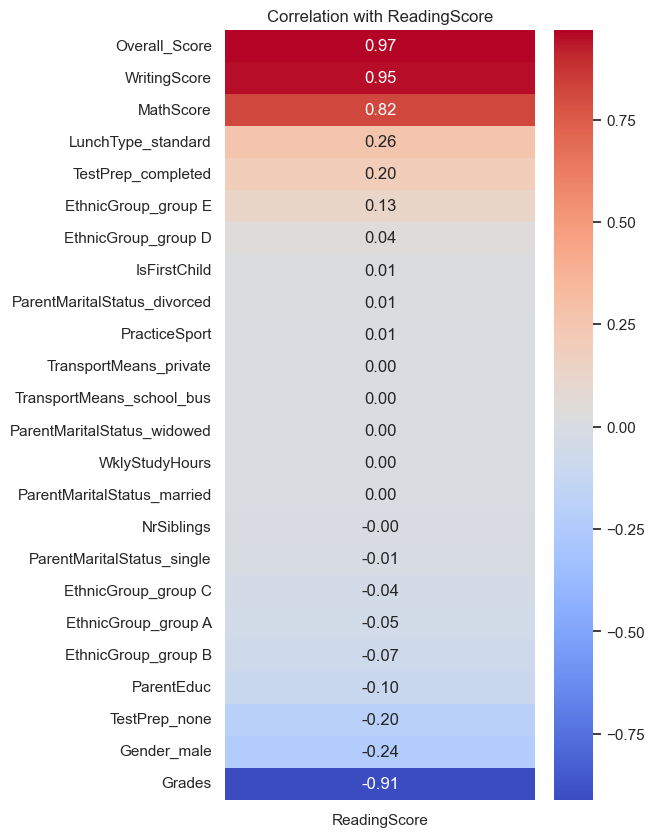

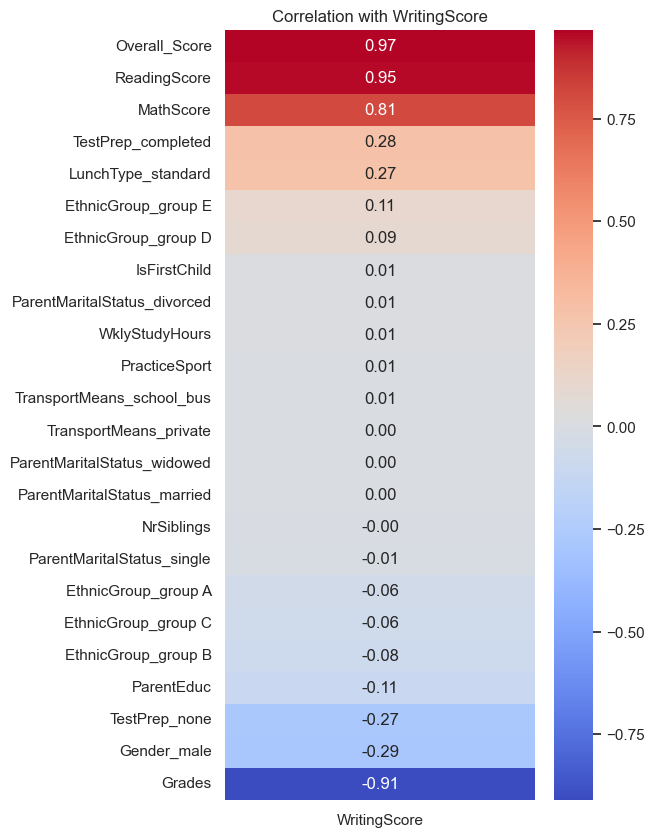

In [55]:

data1 = df.copy()
data = df.copy()
# Compute the correlation matrix
correlation_matrix = data1.corr()
#Graph I.
plt.figure(figsize=(15, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')
plt.title("Correlation Matrix Heatmap")
plt.show()


# Compute the correlation matrix
correlation_matrix = data.corr()

# Graph II, III, IV: Correlation with MathScore, ReadingScore, WritingScore
for score_column in ['MathScore', 'ReadingScore', 'WritingScore']:
    # Create a heatmap of the correlations with the target column
    corr = data.corr()
    target_corr = corr[score_column].drop(score_column)

    # Sort correlation values in descending order
    target_corr_sorted = target_corr.sort_values(ascending=False)

    plt.figure(figsize=(5, 10))
    sns.heatmap(target_corr_sorted.to_frame(), cmap="coolwarm", annot=True, fmt='.2f')
    plt.title(f'Correlation with {score_column}')
    plt.show()

# Findings

## NrSiblings and Academic Scores
- **Correlation with Academic Scores**:
  - The number of siblings (`NrSiblings`) shows very weak negative correlations with all academic scores:
    - `MathScore`: -0.001084
    - `ReadingScore`: -0.000796
    - `WritingScore`: -0.002375
  - This suggests that the number of siblings a subject has is nearly unrelated to their academic performance in math, reading, and writing.

## MathScore, ReadingScore, and WritingScore
- **Inter-correlations**:
  - `MathScore` and `ReadingScore` have a strong positive correlation (0.817825), indicating that students who perform well in math tend to also perform well in reading.
  - `MathScore` and `WritingScore` are also strongly positively correlated (0.807118), suggesting a similar performance pattern between math and writing skills.
  - The strongest positive correlation is observed between `ReadingScore` and `WritingScore` (0.952584). This indicates that reading and writing abilities are very closely linked, with high performance in one typically associated with high performance in the other.


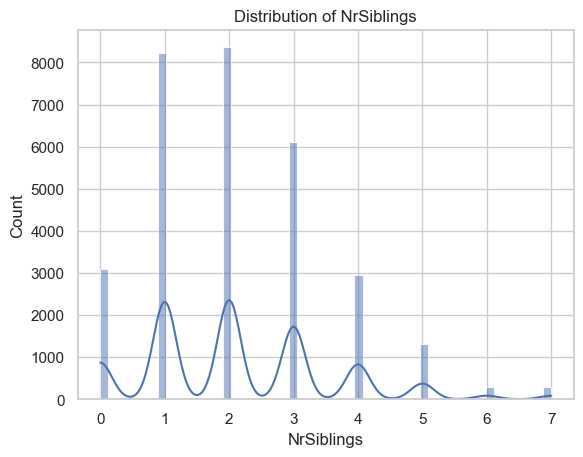

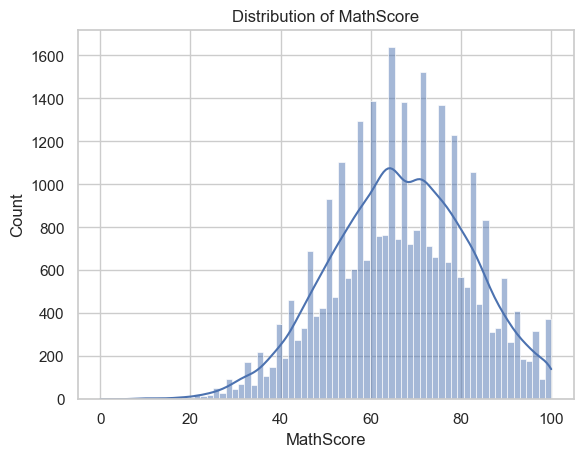

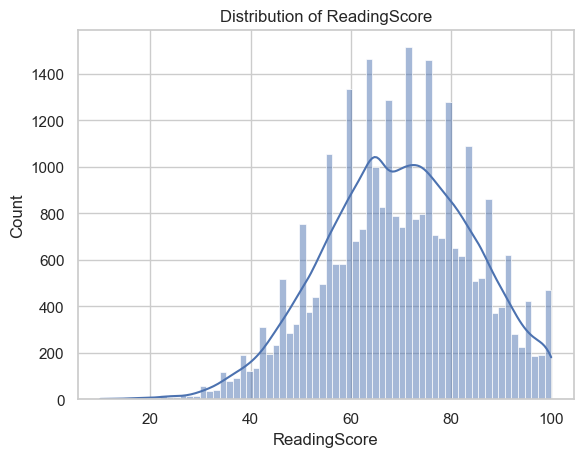

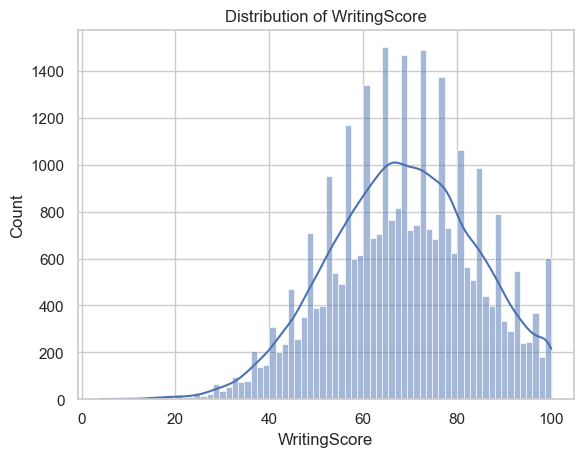

In [56]:


# Set up the visualization layout
sns.set(style="whitegrid")

# Histograms/Density Plots
numerical_columns = ['NrSiblings', 'MathScore', 'ReadingScore', 'WritingScore']
for col in numerical_columns:
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



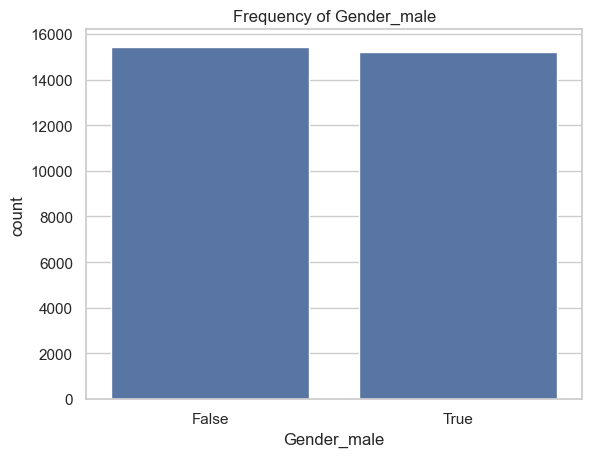

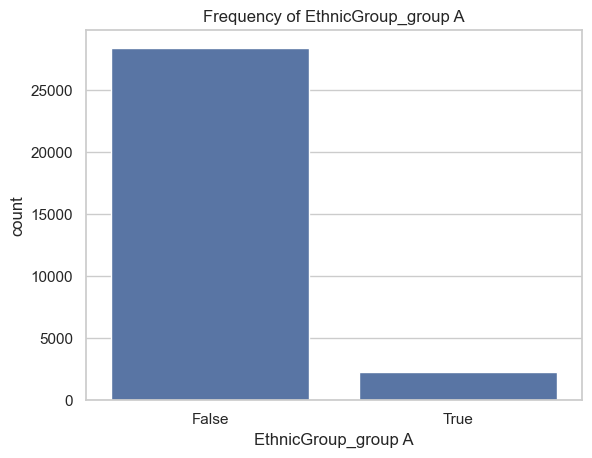

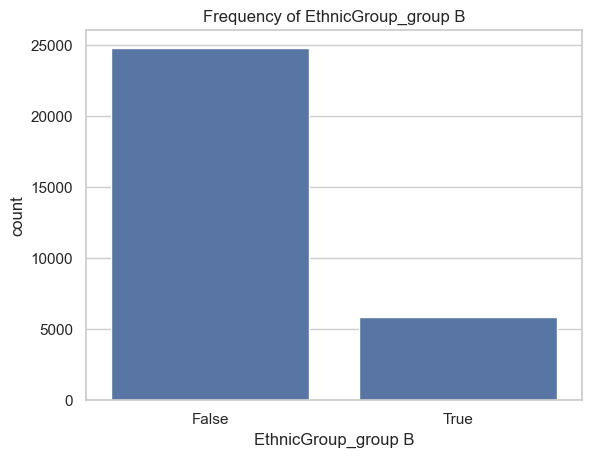

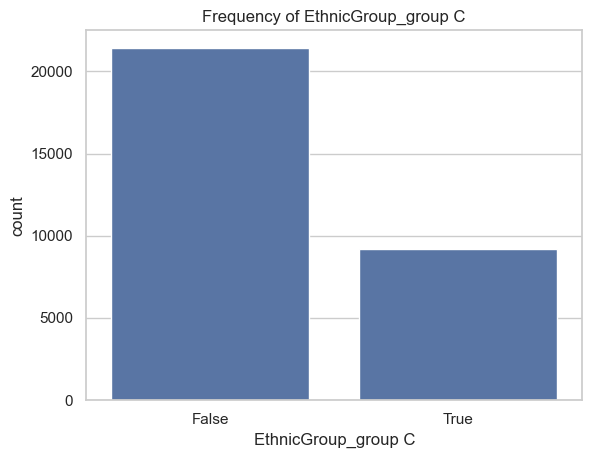

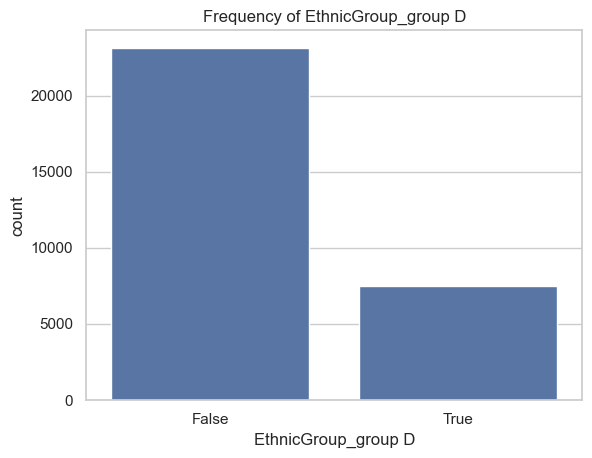

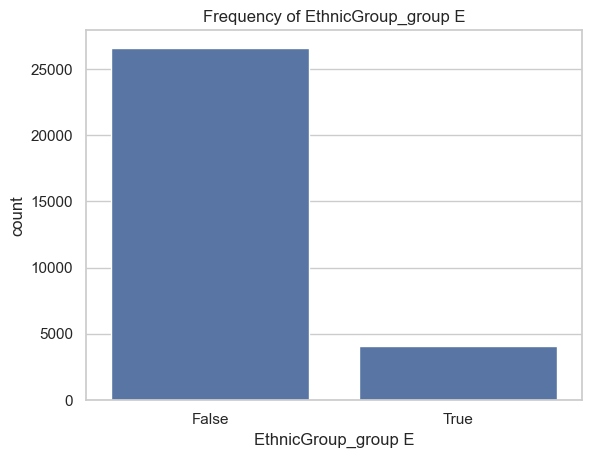

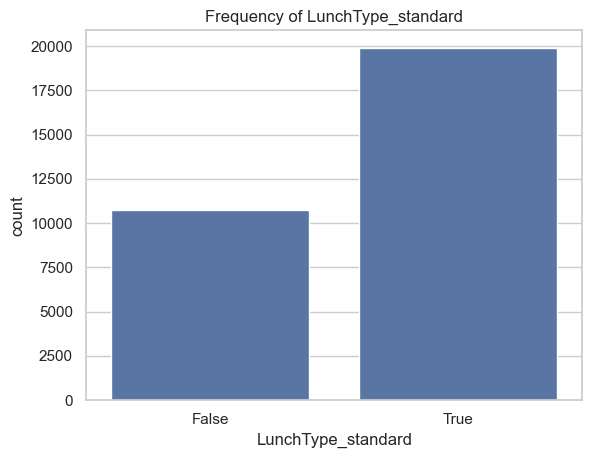

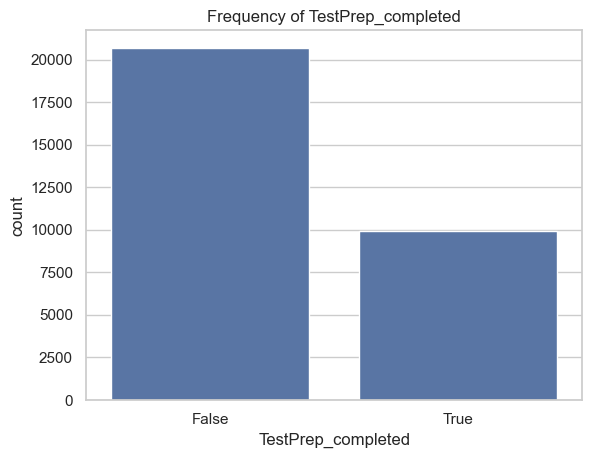

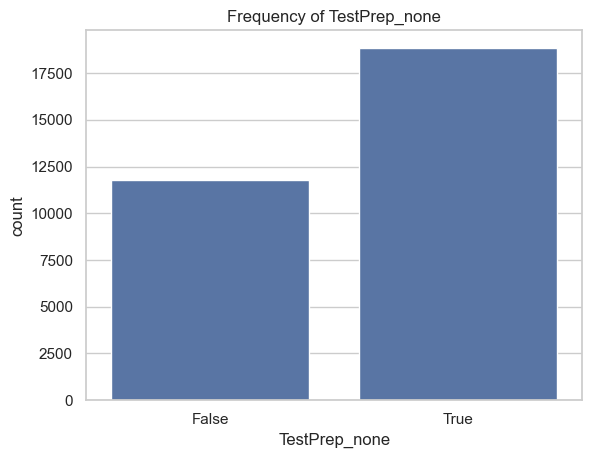

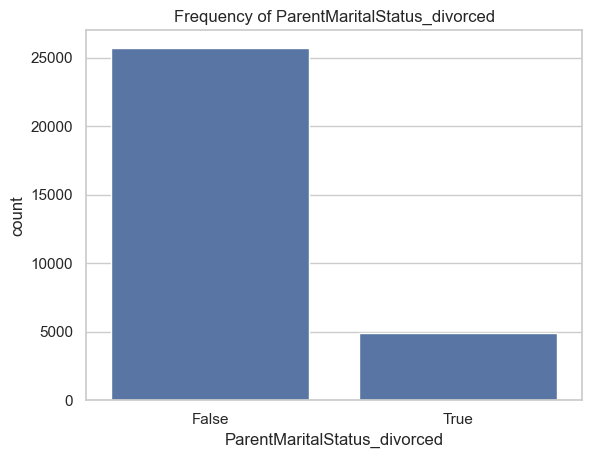

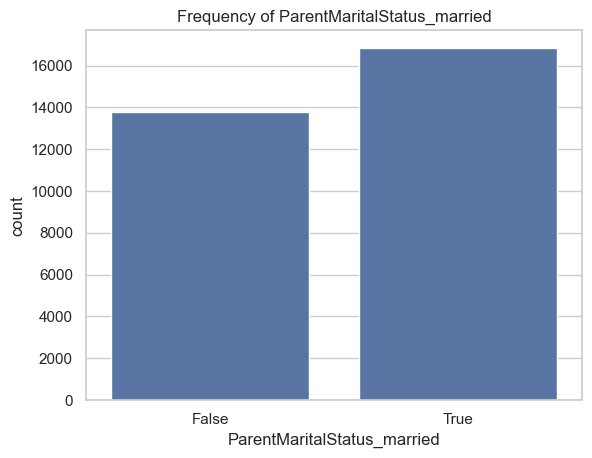

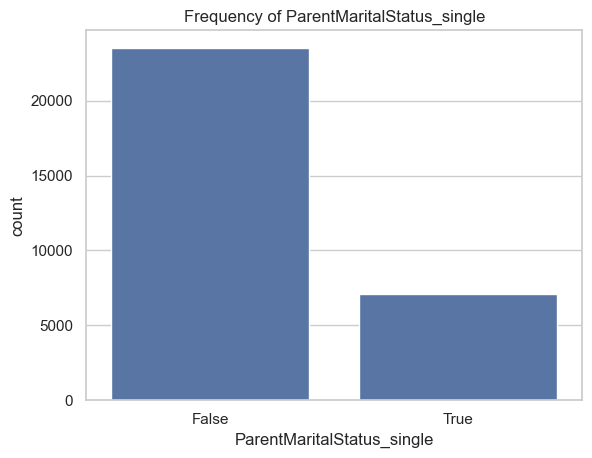

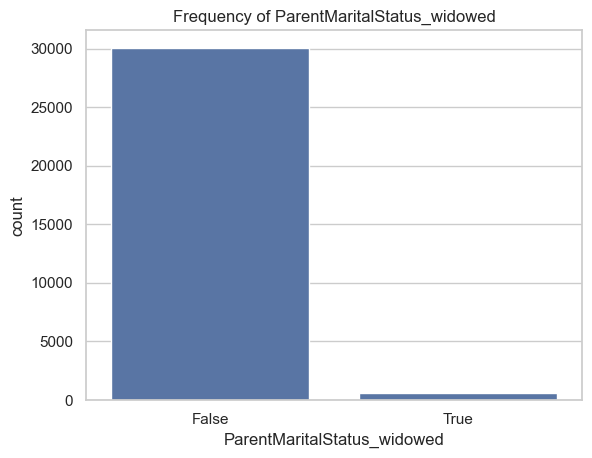

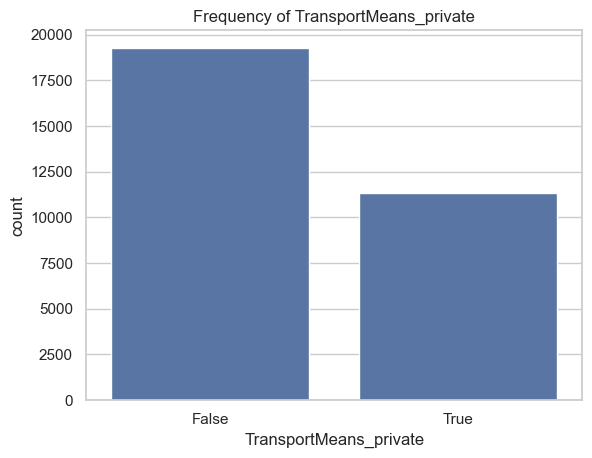

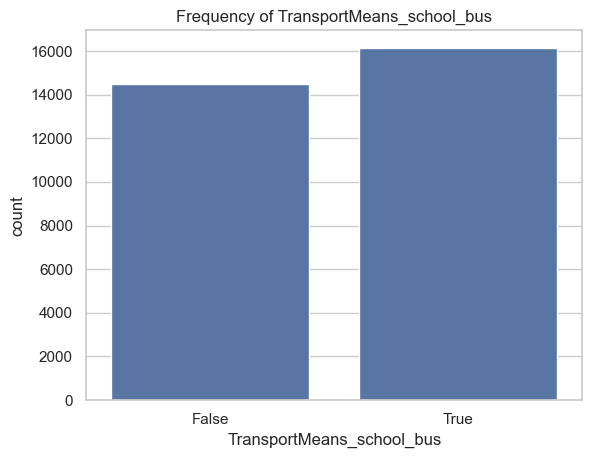

In [57]:

# Bar Charts for Boolean Variables
boolean_columns = [col for col in df.columns if df[col].dtype == 'bool']
for col in boolean_columns:
    sns.countplot(x=df[col])
    plt.title(f'Frequency of {col}')
    plt.show()



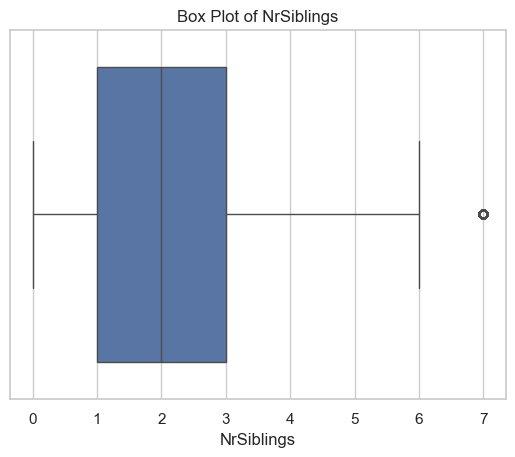

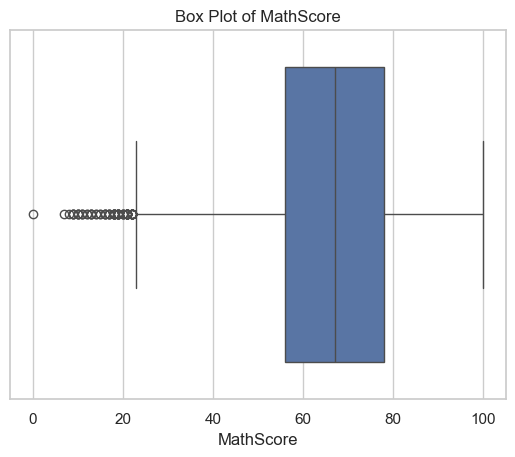

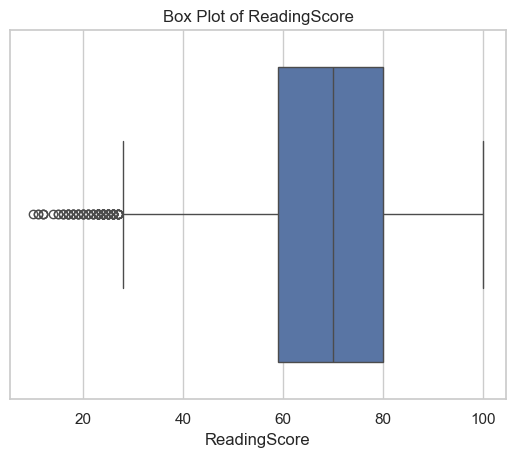

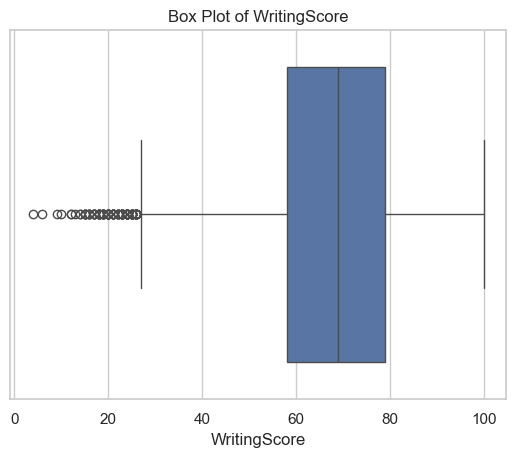

In [58]:
# Box Plots for Numerical Variables
for col in numerical_columns:
    sns.boxplot(x=df[col])
    plt.title(f'Box Plot of {col}')
    plt.show()



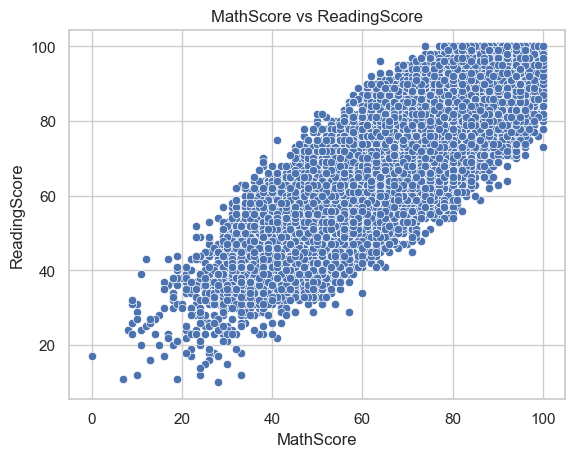

In [59]:
# Scatter Plots
# Example: MathScore vs ReadingScore
sns.scatterplot(x='MathScore', y='ReadingScore', data=df)
plt.title('MathScore vs ReadingScore')
plt.show()


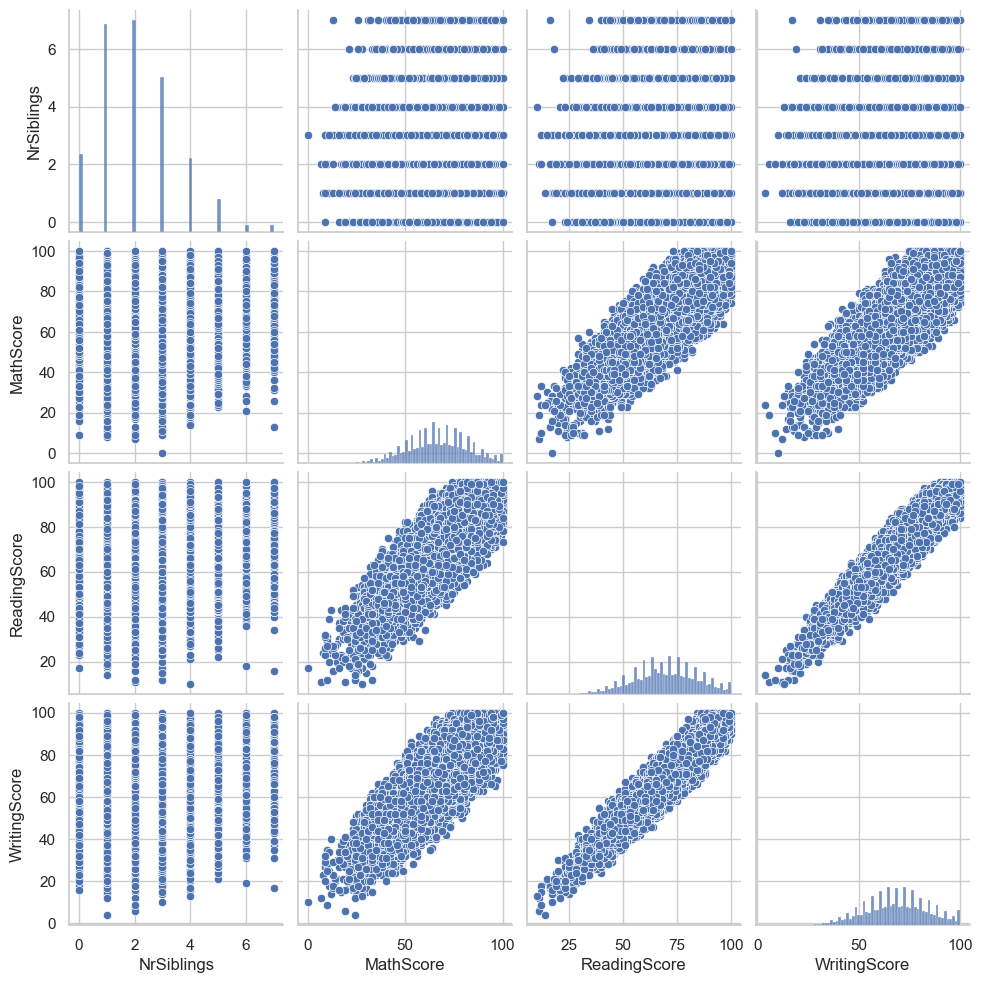

In [60]:

# Pair Plot
sns.pairplot(df[numerical_columns])
plt.show()

# EDA Conclusions and Next Steps

## Understanding the Role of NrSiblings in Academic Performance
- **Analyzing Sibling Count Impact**:
  - It was observed that the number of siblings (`NrSiblings`) has a very weak negative correlation with academic scores (`MathScore`, `ReadingScore`, `WritingScore`). This leads to the conclusion that sibling count may not significantly influence a student's academic performance in these subjects.
  - The focus will be shifted more towards individual student attributes rather than family-related attributes when exploring academic performance.

## Exploring the Link between Different Academic Abilities
- **Examining Correlations Among Scores**:
  - Strong positive correlations were identified among `MathScore`, `ReadingScore`, and `WritingScore`, indicating a significant overlap in the skills required for these subjects.
  - The next steps will include considering that students who excel in one subject area are likely to perform well in others, potentially due to shared factors like study habits or educational environments.

# Plans for Feature Engineering

## Developing Combined Features
- **Creating Linguistic Ability Indicators**:
  - A new feature combining reading and writing scores, either as an average or a total score, is planned to be created. This will help in capturing the overall linguistic ability of students, considering their strong correlation.

## Applying Dimensionality Reduction Techniques
- **Utilizing PCA in High Multicollinearity Scenarios**:
  - Principal Component Analysis (PCA) will be used in situations where multicollinearity is evident among features. This approach will allow for the reduction of the feature set while retaining the most important information.

## Making Strategic Decisions on Feature Inclusion
- **Optimizing for Model Interpretability**:
  - A selective approach to feature inclusion in models is intended, especially choosing either ReadingScore or WritingScore in cases where maintaining model interpretability and reducing redundancy is crucial.

## Investigating Non-linear Patterns
- **Looking Beyond Linear Relationships**:
  - An exploration of non-linear relationships using methods like polynomial features or interaction terms is planned to discover more complex patterns in the data.

## Integrating Contextual Factors
- **Combining Diverse Data Points**:
  - Given the limited correlation of `NrSiblings` with academic scores, an exploration of how it interacts with other factors such as socioeconomic status or parental education levels is anticipated, aiming to unearth more nuanced insights.


In [61]:
# Save df for later modelling
df.to_csv('modified_dataset2.csv', index=False)
